## Homework 3
### Part 1: Imbalanced Dataset

 In this homework, you will be working with an imbalanced Dataset. The dataset is Credit Card Fraud Detection dataset which was hosted on Kaggle. The aim is to detect fraudlent transactions.

## Name: Liwen Zhu
## UNI: lz2512

### Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

### Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Feel free to import any other packages you'd like to
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import auc

### **Data Preprocessing and Exploration**
Download the Kaggle Credit Card Fraud data set. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [3]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### **1.1 Examining the class Imbalance**
**1.1.1 How many observations are in this dataset? How many are positive and negative?**
(Note: Positive labels are labeled as 1)

In [4]:
# Your Code here
raw_df['Class'].value_counts()

print(f"There are {raw_df.shape[0]} observations. 492 are positive and 284315 are negative.")

There are 284807 observations. 492 are positive and 284315 are negative.


#### **1.2 Cleaning and normalizing the data**
The raw data has a few issues. We are not sure what the time column actually means so drop the Time column. The Amount column also has a wide range of values covered so we take the log of the Amount column to reduce its range.

In [5]:
cleaned_df = raw_df.copy()

# You don't want the `Time` column.
cleaned_df.pop('Time')

# The `Amount` column covers a huge range. Convert to log-space.
eps = 0.001 # 0 => 0.1¢
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount')+eps)

**1.2.1 Split the dataset into development and test sets. Please set test size as 0.2 and random state as 42. Print the shape of your development and test features**

In [6]:
# Your Code Here
## YOUR CODE HERE
X=cleaned_df.drop('Class',axis=1)
y=cleaned_df['Class']
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
print(f"X_dev.shape: {X_dev.shape}; X_test.shape: {X_test.shape}; y_dev.shape: {y_dev.shape}; y_test.shape: {y_test.shape}")

X_dev.shape: (227845, 29); X_test.shape: (56962, 29); y_dev.shape: (227845,); y_test.shape: (56962,)


**1.2.2 Normalize the features using Standard Scaler from Sklearn.**

In [7]:
# Your Code Here
ss = StandardScaler()
X_dev = ss.fit_transform(X_dev)
X_test = ss.fit_transform(X_test)

#### **1.3 Defining Model and Performance Metrics**

**1.3.1 First, let us fit a default Decision tree classifier. ( use max_depth=10 and random_state=42). Print the AUC and Average Precision values of 5 Fold Cross Validation**

In [8]:
# Your Code here
dtc = DecisionTreeClassifier(max_depth=10,random_state=42)
scores = cross_validate(dtc,X_dev,y_dev,cv=5,scoring=['roc_auc','average_precision'])
print(f"The AUC scores are {scores['test_roc_auc']}, \
and the average precision scores are {scores['test_average_precision']}")

The AUC scores are [0.88756328 0.88400873 0.81260522 0.77454358 0.82104149], and the average precision scores are [0.62653551 0.71014615 0.60399496 0.58692296 0.68112078]


**1.3.2 Perform random oversampling on the development dataset.**


*   What many positive and negative labels do you observe after random oversampling?
*   What is the shape of your development dataset?

(Note: Set random state as 42 when performing oversampling)


In [9]:
# Your Code here
ros = RandomOverSampler(random_state = 42)
X_dev_over,y_dev_over = ros.fit_resample(X_dev,y_dev)
print(y_dev_over.value_counts())
print(f"There are 227451 positive and 227451 negative labels. The shape of the development dataset is {X_dev_over.shape}")

0    227451
1    227451
Name: Class, dtype: int64
There are 227451 positive and 227451 negative labels. The shape of the development dataset is (454902, 29)


**1.3.3 Repeat 1.3.1 using the dataset you created in the above step(1.3.2 Random oversampling). (Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10 and random_state=42. This will help us to compare the models)**

In [10]:
# Your Code here
scores_over = cross_validate(dtc,X_dev_over,y_dev_over,cv=5,scoring=['roc_auc','average_precision'])
print(f"The AUC scores are {scores_over['test_roc_auc']}, and the average precision scores are {scores_over['test_average_precision']}")

The AUC scores are [0.99886808 0.99929956 0.99900977 0.99926441 0.99932258], and the average precision scores are [0.99816396 0.99884446 0.99826911 0.9986672  0.99874564]


**1.3.4 Perform Random undersampling on the development dataset**. 
- What many positive and negative labels do you observe after random undersampling?
- What is the shape of your development dataset?
(Note: Set random state as 42 when performing undersampling)

In [11]:
# Your Code here
rus = RandomUnderSampler(random_state = 42)
X_dev_under,y_dev_under = rus.fit_resample(X_dev,y_dev)
print(y_dev_under.value_counts())
print(f"There are 394 positive and 394 negative labels. The shape of the development dataset is {X_dev_under.shape}")

0    394
1    394
Name: Class, dtype: int64
There are 394 positive and 394 negative labels. The shape of the development dataset is (788, 29)


**1.3.5 Repeat 1.3.1 using the dataset you created in the above step(1.3.4 Random undersampling). (Make sure you use the same hyperparameters as 1.3.1. i,e., max_depth=10 and random_state=42. This will help us to compare the models)**

In [12]:
# Your Code here
scores_under = cross_validate(dtc,X_dev_under,y_dev_under,cv=5,scoring=['roc_auc','average_precision'])
print(f"The AUC scores are {scores_under['test_roc_auc']}, and the average precision scores are {scores_under['test_average_precision']}")

The AUC scores are [0.93662875 0.94936709 0.9097901  0.92583577 0.92989289], and the average precision scores are [0.91336577 0.92661432 0.86678359 0.90629539 0.89830283]


**1.3.6 Perform Synthetic Minority Oversampling Technique(SMOTE) on the development dataset**
- What many positive and negative labels do you observe after performing SMOTE?
- What is the shape of your development dataset? (Note: Set random state as 42 when performing SMOTE)

In [13]:
# Your code here
smo = SMOTE(random_state = 42)
X_dev_smote,y_dev_smote = smo.fit_resample(X_dev,y_dev)
print(y_dev_smote.value_counts())
print(f"There are 227451 positive and negative labels. The shape of the development dataset is {X_dev_smote.shape}")

0    227451
1    227451
Name: Class, dtype: int64
There are 227451 positive and negative labels. The shape of the development dataset is (454902, 29)


**1.3.7 Repeat 1.3.1 using the dataset you created in the above step(1.3.6 SMOTE). (Make sure you use the same hyperparameters as 1.3.1. i.e., max_depth=10 and random_state=42. This will help us to compare the models)**

In [14]:
# Your Code here
scores_smote = cross_validate(dtc,X_dev_smote,y_dev_smote,cv=5,scoring=['roc_auc','average_precision'])
print(f"The AUC scores are {scores_smote['test_roc_auc']}, and the average precision scores are {scores_smote['test_average_precision']}")

The AUC scores are [0.99757923 0.99738426 0.99772842 0.9972463  0.99714931], and the average precision scores are [0.99667622 0.99645425 0.99685462 0.99619248 0.99611009]


**1.3.8 Make predictions on the test set using the four models that you built and report their AUC values.**

In [15]:
# Your Code here
dtc = DecisionTreeClassifier(max_depth=10,random_state=42)
dtco = DecisionTreeClassifier(max_depth=10,random_state=42)
dtcu = DecisionTreeClassifier(max_depth=10,random_state=42)
dtcs = DecisionTreeClassifier(max_depth=10,random_state=42)

dtc.fit(X_dev,y_dev)
test = dtc.predict_proba(X_test)[:,1]

dtco.fit(X_dev_over,y_dev_over)
test_over = dtco.predict_proba(X_test)[:,1]

dtcu.fit(X_dev_under,y_dev_under)
test_under = dtcu.predict_proba(X_test)[:,1]

dtcs.fit(X_dev_smote,y_dev_smote)
test_smote = dtcs.predict_proba(X_test)[:,1]


print(f"The AUC score of decision tree is :{roc_auc_score(y_test, test)}, \
of oversampling is {roc_auc_score(y_test, test_over)}, \
of undersampling is {roc_auc_score(y_test, test_under)}, \
of SMOTE is {roc_auc_score(y_test, test_smote)}.")

The AUC score of decision tree is :0.819676270198569, of oversampling is 0.9017043350120015, of undersampling is 0.896389918516647, of SMOTE is 0.8753799792989789.


**1.3.9 Plot Confusion Matrices for all the four models on the test set. Comment your results**

/Users/alanzhu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/alanzhu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/alanzhu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be rem

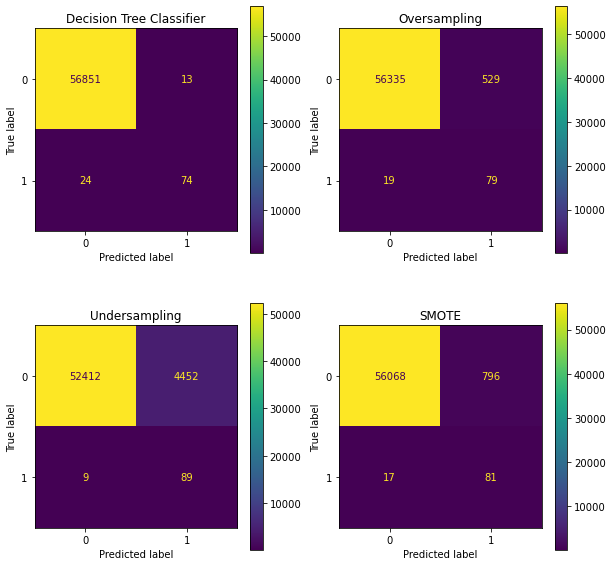

The undersampling model has the highest recall score and the lowest precision score. The basic decision tree classifier has the highest precision score. The DTC, oversampling, and SMOTE has almost the same on the recall score. 


In [16]:
# Your Code here
fig, ax = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(10)
plot_confusion_matrix(dtc, X_test, y_test,ax=ax[0,0])
ax[0,0].set_title('Decision Tree Classifier')
plot_confusion_matrix(dtco, X_test, y_test,ax=ax[0,1]) 
ax[0,1].set_title('Oversampling')
plot_confusion_matrix(dtcu, X_test, y_test,ax=ax[1,0])
ax[1,0].set_title('Undersampling')
plot_confusion_matrix(dtcs, X_test, y_test,ax=ax[1,1])
ax[1,1].set_title('SMOTE')
plt.show()
print("The undersampling model has the highest recall score and the lowest precision score. \
The basic decision tree classifier has the highest precision score. The DTC, oversampling, and SMOTE has \
almost the same on the recall score. ")

**1.3.10 Plot ROC for all the four models on the test set in a single plot. Make sure you label axes and legend properly. Comment your results**

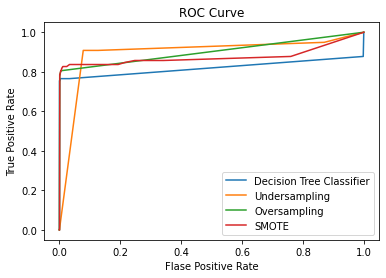

The undersampling model has less true positive rate than the others at the initial stage. The other three models' performance are alike. Among these three, oversampling has the largest AUROC, then is SMOTE, and the last is Decision Tree Classifier.


In [21]:
# Your code
proba = dtc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, proba, pos_label=1)

probao = dtco.predict_proba(X_test)[:,1]
fpro, tpro, thresholdso = roc_curve(y_test, probao, pos_label=1)

probau = dtcu.predict_proba(X_test)[:,1]
fpru, tpru, thresholdsu = roc_curve(y_test, probau, pos_label=1)

probas = dtcs.predict_proba(X_test)[:,1]
fprs, tprs, thresholdss = roc_curve(y_test, probas, pos_label=1)


plt.plot(fpr,tpr,label="Decision Tree Classifier")
plt.plot(fpru,tpru,label="Undersampling")
plt.plot(fpro,tpro,label="Oversampling")
plt.plot(fprs,tprs,label="SMOTE")
plt.legend(loc=0)
plt.xlabel("Flase Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
print("The undersampling model has less true positive rate than the others at the initial stage. \
The other three models' performance are alike. \
Among these three, oversampling has the largest AUROC, then is SMOTE, and the last is Decision Tree \
Classifier.")

**1.3.11 Train a balanced default Decision tree classifier. ( use max_depth=10 and random_state=42). ( balance the class weights). Print the AUC and average precision on dev set**

In [18]:
# Your code here
dtcb = DecisionTreeClassifier(max_depth=10,random_state=42,class_weight='balanced')
scores_bal = cross_validate(dtcb,X_dev,y_dev,cv=5,scoring=['roc_auc','average_precision'])
print(f"The AUC score is {scores['test_roc_auc'].mean()}, and the average precision score is {scores['test_average_precision'].mean()}")


The AUC score is 0.8359524571279693, and the average precision score is 0.641744070059615


<!-- **1.3.12 Train a balanced Decision tree classifier. (You can use max_depth=10 and random_state=42)( balance the class weights). Print the AUC and average precision on test set** (Use Random state = 42) -->

**1.3.12 Plot confusion matrix on test set using the above model and comment on your results**

/Users/alanzhu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


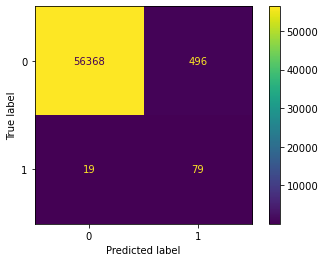

After balancing the weight, the balanced dtc's performance is similar to Oversampling and SMOTE. It has a realitive high recall score and low precision score.


In [19]:
# Your code here
dtcb.fit(X_dev,y_dev)
plot_confusion_matrix(dtcb, X_test, y_test)
plt.show()
print("After balancing the weight, the balanced dtc's performance is similar to Oversampling and SMOTE. \
It has a realitive high recall score and low precision score.")